# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 13 July 2022
* Student Name: Eve Schoenrock
* Student Net ID: ufu2rg
* This URL: https://github.com/eveschoen/montecarlo/blob/main/final-project-submission.ipynb
* GitHub Repo URL: https://github.com/eveschoen/montecarlo

# The Monte Carlo Module

In [1]:
import numpy as np
import pandas as pd

In [2]:
class Die:
    """
    PURPOSE: This class creates a die of any number of sides, with default weights of 1. Methods that can be applied to the die include changing the weight (change_weight), rolling the die (roll_die), and showing the die (show_die).
    
    INPUT:
    arr   array of die faces
    
    OUTPUT: 
    depends on the method applied
    """
    __diedf = 0
    
    def __init__(self, arr):
        """
        PURPOSE: Initializes the new die object and saves faces and weights to a private dataframe that is shared by other methods of this class.
        
        INPUT:
        arr   array of die faces
        
        OUTPUT:
        none
        """
        self.n = arr.tolist()
        self.weights = np.ones(len(self.n))
        self.__diedf = pd.DataFrame({'side':self.n,\
                                   'weight':self.weights})
        self.__diedf = self.__diedf.set_index('side')
    
    def change_weight(self, face_val, new_weight):
        """
        PURPOSE: Change the weight of a single side of the die.
        
        INPUTS:
        face_val    the face value to be changed (str/float/int)
        new_weight  the desired weight of specified die (float/int)
        
        OUTPUT:
        none
        print statements if incorrect inputs are provided
        """
        if face_val in self.n:
            
            if type(new_weight) == float:
                self.__diedf.loc[face_val, 'weight'] = new_weight
            elif type(new_weight) == int:
                new_weight = float(new_weight)
                self.__diedf.loc[face_val, 'weight'] = new_weight
            else:
                print('The new weight is not the correct data type - please input a float or an integer')
                
        else:
            print('This face value is not valid because it is not found.')
    
    def roll_die(self, num_rolls = 1):
        """
        PURPOSE: Rolls the die one or more times
        
        INPUT:
        num_rolls   the number of times to roll the die - defaults to 1 (int)
        
        OUTPUT:
        results    a list of the outcomes of the die rolls
        """
        results = []
        
        for i in range(num_rolls):
            result = self.__diedf.reset_index()['side']\
            .sample(weights=self.__diedf.reset_index()['weight'])\
            .values[0]
            results.append(result)
            
        return results
    
    def show_die(self):
        """
        PURPOSE: Show the user the die's current set of faces/weights.
        
        INPUT:
        none
        
        OUTPUT:
        the dataframe of the die created in the initializer
        """
        return self.__diedf
    
    
class Game:
    """
    PURPOSE: This class plays the dice game by rolling one or more of the same kind of dice one or more times. Note that each die in a given game will have the same number of sides and associated faces, but each die may have its own weights. This class keeps the results of the most recent play.
    
    INPUT:
    die_lst    a list of die objects
    
    OUTPUT:
    depends on the method applied
    """
    
    def __init__(self, die_lst):
        """
        PURPOSE: Initializes a game.
        
        INPUT:
        die_lst    a list of die objects
        
        OUTPUT:
        none
        """
        self.die_lst = die_lst
        
    def play(self, num_rolls):
        """
        PURPOSE: Rolls the dice however many times are specified in num_rolls and saves the results of the game to a private dataframe. 
        
        INPUT:
        num_rolls    number of rolls for the group of dice (int)
        
        OUTPUT:
        none - saves the results to a private dataframe
        """
        results = []
        for die in self.die_lst:
            die_rolls = []
            for i in range(num_rolls):
                result = die.show_die()\
                .reset_index()['side']\
                .sample(weights=die.show_die()\
                        .reset_index()['weight'])\
                .values[0]
                
                die_rolls.append(result)
            results.append(die_rolls)
    
        self.__play_df = pd.DataFrame(results)
        self.__play_df.index.name = 'die_number'
        self.__play_df.T.index.name = 'roll_number'
    
    def show_results(self, df_form = 'wide'):
        """
        PURPOSE: Shows the user the results of the most recent play in the game by passing the dataframe to the user in a specified format.
        
        INPUT:
        df_form    optional argument that takes the form "wide" or "narrow" for the dataframe
        
        OUTPUT:
        either the narrow or wide form of the private dataframe containing play results
        """
        if df_form == 'narrow':
            narrow_df = pd.DataFrame(self.__play_df.stack()).rename(columns={0:'face_rolled'})
            return narrow_df
        elif df_form == 'wide':
            return self.__play_df.T
        else:
            raise Exception("Form must be set to either 'wide' or 'narrow'")
            

class Analyzer:
    """
    PURPOSE: This class takes the results of a single game and computes various descriptive statistical properties about it. 
    
    INPUT:
    game_results    a Game object with shown results (wide or narrow) as the input (dataframe)
    
    OUTPUT:
    depends on method applied
    """
    def __init__(self, game_results):
        """
        PURPOSE: Initializes the analyzer.
        
        INPUT:
        game_results   a Game object with shown results (wide or narrow) as the input (dataframe)
        
        OUTPUT:
        none
        """
        self.game_results = game_results
    
    def comp_jackpot(self):
        """
        PURPOSE: Computes how many times the game resulted in all faces of the dice being identical, or in other words, the "jackpot."
        
        INPUT:
        none
        
        OUTPUT:
        the number of times the game had a jackpot (int)
        """
        if len(self.game_results.columns) == 1:
            game_unstacked = self.game_results.unstack(level = 0)
            jackpots = 0
            self.jackpot_df = pd.DataFrame([])
    
            for i in range(len(game_unstacked)):
                arr = game_unstacked.loc[i, :]
                if np.all(arr == arr[0]) == True:
                    jackpots += 1
                    for j in range(len(game_unstacked.columns)):
                        self.jackpot_df.loc[i, j] = arr[0]
                else:
                    continue
            self.jackpot_df.index.name = 'roll_number'
            return jackpots
        else:
            jackpots = 0
            self.jackpot_df = pd.DataFrame([])
    
            for i in range(len(self.game_results)):
                arr = self.game_results.loc[i, :]
                if np.all(arr == arr[0]) == True:
                    jackpots += 1
                    for j in range(len(self.game_results.columns)):
                        self.jackpot_df.loc[i, j] = arr[0]
                else:
                    continue
            self.jackpot_df.index.name = 'roll_number'
            return jackpots
        
    def comp_combo(self):
        """
        PURPOSE: Computes the distinct combinations of faces rolled, along with their counts.
        
        INPUT:
        none
        
        OUTPUT:
        none - results are stored as combo_df (dataframe)
        """
        # narrow df
        if len(self.game_results.columns) == 1:
            self.combo_df = self.game_results.unstack(level = 0).apply(lambda x:\
                                                                       pd.Series(sorted(x)),\
                                                                       1).\
            value_counts().to_frame('n')

            
        else: # if the game is provided as a wide df
            self.combo_df = self.game_results.apply(lambda x:\
                                                    pd.Series(sorted(x)),\
                                                    1).value_counts().to_frame('n')
            
    def count_faces_per_roll(self, count_val):
        """
        PURPOSE: Compute how many times a given face is rolled in each event/roll.
        
        INPUT:
        count_val    the face value to look for (int/float/str - must be an existing face value)
        
        OUTPUT:
        none - results are stored as val_counts_df (dataframe)
        """
        val_counts = []
        # narrow df
        if len(self.game_results.columns) == 1:
            game_unstacked = self.game_results.unstack(level = 0)
            
            for i in range(len(game_unstacked.index)):
                count = 0
                for j in range(len(game_unstacked.columns)):
                    if game_unstacked.loc[i][j] == count_val:
                        count += 1
                    else:
                        continue
                val_counts.append(count)
            list_index = list(game_unstacked.index)
                
        # wide df
        else:
            for i in range(len(self.game_results.index)):
                count = 0
                for j in range(len(self.game_results.columns)):
                    if self.game_results[j][i] == count_val:
                        count += 1
                    else:
                        continue
                val_counts.append(count)
            list_index = list(self.game_results.index)
        
        self.val_counts_df = pd.DataFrame(val_counts, list_index)

# Test Module

In [3]:
import pandas as pd
import numpy as np
import unittest
from montecarlo.montecarlo import Die

class DieTestSuite(unittest.TestCase):
    """
    PURPOSE: This class will test the Die class using unittest.
    
    INPUT:
    none
    
    OUTPUT:
    none
    """
    def test_1_change_weight(self):
        """
        PURPOSE: Test whether or not the 'change_weight' method of the Die class functions properly. In particular, it checks that the weight of the 'a' face changes to 2 when specified.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array(['a', 'b', 'c']))
        die1.change_weight('a', 2)
        
        actual = die1.show_die().loc['a', 'weight']
        expected = 2.0
        self.assertEqual(actual, expected)
    
    def test_2_roll_die_default(self):
        """
        PURPOSE: Test whether or not the 'roll_die' method of the Die class functions properly. It tests the default value for the number of rolls, 1, making sure that the die rolled once.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        
        actual = len(die2.roll_die())
        expected = 1
        self.assertEqual(actual, expected)
    
    def test_3_roll_die(self):
        """
        PURPOSE: Test whether or not the 'roll_die' method of the Die class functions properly. It tests when the roll number is 10, making sure that the die in the function is actually rolled 10 times.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die3 = Die(np.array([1, 2, 3, 4, 5, 6]))
        
        actual = len(die3.roll_die(10))
        expected = 10
        self.assertEqual(actual, expected)
    
    def test_4_show_die(self):
        """
        PURPOSE: Tests the 'show_die' method of the Die class. It develops a dataframe to compare against a dataframe formed by the 'show_die' method and makes sure they are the same.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die4 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die4.change_weight(3, 5)
        
        actual_df = die4.show_die().reset_index()
        expected_df = pd.DataFrame({'side': [1, 2, 3, 4, 5, 6],\
                                    'weight': [1, 1, 5, 1, 1, 1]})
        
        actual_lst = []
        for i in range(len(actual_df)):
            if actual_df.iloc[i, 1] == expected_df.iloc[i, 1]:
                actual_lst.append(1)
            else:
                actual_lst.append(2)
        
        actual = all(x == 1 for x in actual_lst)
        expected = True
        self.assertEqual(actual, expected)
        
        
from montecarlo.montecarlo import Game

class GameTestSuite(unittest.TestCase):
    """
    PURPOSE: This class will test the Game class using unittest.
    
        INPUT:
        none
        
        OUTPUT:
        none
    """
    def test_1_play(self):
        """
        PURPOSE: Tests the 'play' method of the Game class by checking that a set dataframe with length 5 and a dataframe made of a game played 5 times have the same length. 
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array([4, 5, 6]))
        die2 = Die(np.array([4, 5, 6]))
        die3 = Die(np.array([4, 5, 6]))
        dice = [die1, die2, die3]
        game1 = Game(dice)
            
        game1.play(5)
        game1_df = game1.show_results()
            
        actual_len = len(game1_df)
        expected_len = 5
        actual_width = len(game1_df.columns)
        expected_width = 3
            
        actual = actual_len == expected_len and actual_width == expected_width
        expected = True
        self.assertEqual(actual, expected)
            
    def test_2_show_results_narrow(self):
        """
        PURPOSE: Tests the 'show_results' method of the Game class (a narrow dataframe). It compares an integer for what the length of the resulting dataframe should be with the actual length of the dataframe.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array(['a', 'b', 'c']))
        die2 = Die(np.array(['a', 'b', 'c']))
        die3 = Die(np.array(['a', 'b', 'c']))
        dice = [die1, die2, die3]
        game1 = Game(dice)
            
        game1.play(5)
        game1_df = game1.show_results('narrow')
            
        actual_len = len(game1_df)
        expected_len = 15
        actual_width = len(game1_df.columns)
        expected_width = 1
            
        actual = actual_len == expected_len and actual_width == expected_width
        expected = True
        self.assertEqual(actual, expected)
        
    def test_3_show_results_wide(self):
        """
        PURPOSE: Tests the 'show_results' method of the Game class (wide dataframe). It compares the expected length and width of the resulting dataframe with the actual length and width of the dataframe to ensure they are the same.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array(['a', 'b', 'c']))
        die2 = Die(np.array(['a', 'b', 'c']))
        die3 = Die(np.array(['a', 'b', 'c']))
        dice = [die1, die2, die3]
        game1 = Game(dice)
            
        game1.play(50)
        game1_df = game1.show_results()
            
        actual_len = len(game1_df)
        expected_len = 50
        actual_width = len(game1_df.columns)
        expected_width = 3
            
        actual = actual_len == expected_len and actual_width == expected_width
        expected = True
        self.assertEqual(actual, expected)
        
        
from montecarlo.montecarlo import Analyzer

class AnalyzerTestSuite(unittest.TestCase):
    """
    PURPOSE: This class will test the Analyzer class using unittest.
    
        INPUT:
        none
        
        OUTPUT:
        none
    """
    def test_1_comp_jackpot_wide(self):
        """
        PURPOSE: Tests the 'comp_jackpot' method of the Analyzer class on a wide dataframe by checking that the output is an integer, which is expected.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array([1, 2, 3, 4, 5]))
        die2 = Die(np.array([1, 2, 3, 4, 5]))
        die3 = Die(np.array([1, 2, 3, 4, 5]))
        die2.change_weight(1, 3)
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(3)
        game_results_wide = game.show_results('wide')
            
        analyze_wide = Analyzer(game_results_wide)
        num_jackpots = analyze_wide.comp_jackpot()
            
        actual = type(num_jackpots)
        expected = int
        self.assertEqual(actual, expected)
            
    def test_2_comp_jackpot_nar(self):
        """
        PURPOSE: Tests the 'comp_jackpot' method of the Analyzer class on a narrow dataframe by checking that the actual output is an integer, which is expected.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array([1, 2, 3, 4, 5]))
        die2 = Die(np.array([1, 2, 3, 4, 5]))
        die3 = Die(np.array([1, 2, 3, 4, 5]))
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(3)
        game_results_nar = game.show_results('narrow')
            
        analyze_nar = Analyzer(game_results_nar)
        num_jackpots = analyze_nar.comp_jackpot()
            
        actual = type(num_jackpots)
        expected = int
        self.assertEqual(actual, expected)
        
    def test_3_comp_combo_wide(self):
        """
        PURPOSE: Tests the 'comp_combo' method of the Analyzer class on a wide dataframe by checking that the length of the resulting dataframe is an integer, which is expected, and signifies that a dataframe has been constructed.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array([1, 2, 3, 4, 5]))
        die2 = Die(np.array([1, 2, 3, 4, 5]))
        die3 = Die(np.array([1, 2, 3, 4, 5]))
        die2.change_weight(1, 3)
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(3)
        game_results_wide = game.show_results('wide')
            
        analyze_wide = Analyzer(game_results_wide)
        analyze_wide.comp_combo()
        num_combos = len(analyze_wide.combo_df)
            
        actual = type(num_combos)
        expected = int
        self.assertEqual(actual, expected)
        
    def test_4_comp_combo_nar(self):
        """
        PURPOSE: Tests the 'comp_combo' method of the Analyzer class on a narrow dataframe by checking that the length of the resulting dataframe is an integer, which is expected, and shows that a dataframe is created.
        
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array([1, 2, 3, 4, 5]))
        die2 = Die(np.array([1, 2, 3, 4, 5]))
        die3 = Die(np.array([1, 2, 3, 4, 5]))
        die2.change_weight(1, 3)
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(3)
        game_results_nar = game.show_results('narrow')
            
        analyze_nar = Analyzer(game_results_nar)
        analyze_nar.comp_combo()
        num_combos = len(analyze_nar.combo_df)
            
        actual = type(num_combos)
        expected = int
        self.assertEqual(actual, expected)
            
    def test_5_count_faces_per_roll_wide(self):
        """
        PURPOSE: Tests the 'count_faces_per_roll' method of the Analyzer class on a wide dataframe by ensuring the length of the resulting dataframe is as expected.
            
        INPUT:
        none
        
        OUTPUT:
        none
        """
        die1 = Die(np.array(['a', 'b', 'c']))
        die2 = Die(np.array(['a', 'b', 'c']))
        die3 = Die(np.array(['a', 'b', 'c']))
        die2.change_weight('b', 3)
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(10)
        game_results_wide = game.show_results('wide')
            
        analyze_wide = Analyzer(game_results_wide)
        analyze_wide.count_faces_per_roll(3)
            
        actual = len(analyze_wide.val_counts_df)
        expected = 10
        self.assertEqual(actual, expected)
        
    def test_6_count_faces_per_roll_nar(self):
        """
        PURPOSE: Tests the 'count_faces_per_roll' method of the Analyzer class on a narrow dataframe by ensuring the length of the resulting dataframe is as expected.
        """
        die1 = Die(np.array(['a', 'b', 'c']))
        die2 = Die(np.array(['a', 'b', 'c']))
        die3 = Die(np.array(['a', 'b', 'c']))
        die2.change_weight('b', 3)
        dice = [die1, die2, die3]
            
        game = Game(dice)
        game.play(10)
        game_results_nar = game.show_results('narrow')
            
        analyze_nar = Analyzer(game_results_nar)
        analyze_nar.count_faces_per_roll(3)
            
        actual = len(analyze_nar.val_counts_df)
        expected = 10
        self.assertEqual(actual, expected)
            
    
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

# argv=['first-arg-is-ignored'] <- this argument is only used in this jupyter notebook

test_1_comp_jackpot_wide (__main__.AnalyzerTestSuite) ... ok
test_2_comp_jackpot_nar (__main__.AnalyzerTestSuite) ... ok
test_3_comp_combo_wide (__main__.AnalyzerTestSuite) ... ok
test_4_comp_combo_nar (__main__.AnalyzerTestSuite) ... ok
test_5_count_faces_per_roll_wide (__main__.AnalyzerTestSuite) ... ok
test_6_count_faces_per_roll_nar (__main__.AnalyzerTestSuite) ... ok
test_1_change_weight (__main__.DieTestSuite) ... ok
test_2_roll_die_default (__main__.DieTestSuite) ... ok
test_3_roll_die (__main__.DieTestSuite) ... ok
test_4_show_die (__main__.DieTestSuite) ... ok
test_1_play (__main__.GameTestSuite) ... ok
test_2_show_results_narrow (__main__.GameTestSuite) ... ok
test_3_show_results_wide (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.738s

OK


# Test Results

test_1_comp_jackpot_wide (__main__.AnalyzerTestSuite) ... ok<br>
test_2_comp_jackpot_nar (__main__.AnalyzerTestSuite) ... ok<br>
test_3_comp_combo_wide (__main__.AnalyzerTestSuite) ... ok<br>
test_4_comp_combo_nar (__main__.AnalyzerTestSuite) ... ok<br>
test_5_count_faces_per_roll_wide (__main__.AnalyzerTestSuite) ... ok<br>
test_6_count_faces_per_roll_nar (__main__.AnalyzerTestSuite) ... ok<br>
test_1_change_weight (__main__.DieTestSuite) ... ok<br>
test_2_roll_die_default (__main__.DieTestSuite) ... ok<br>
test_3_roll_die (__main__.DieTestSuite) ... ok<br>
test_4_show_die (__main__.DieTestSuite) ... ok<br>
test_1_play (__main__.GameTestSuite) ... ok<br>
test_2_show_results_narrow (__main__.GameTestSuite) ... ok<br>
test_3_show_results_wide (__main__.GameTestSuite) ... ok<br>

----------------------------------------------------------------------<br>
Ran 13 tests in 0.609s<br>

OK<br>


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [4]:
import pandas as pd
import numpy as np

## Scenario 1

Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [5]:
from montecarlo.montecarlo import Die

In [6]:
arr1 = np.array(['H', 'T'])
fair_die = Die(arr1)
unfair_die = Die(arr1)

In [7]:
unfair_die.change_weight('H', 5)

Play a game of 1000 flips of three coins with all fair dice.

In [8]:
from montecarlo.montecarlo import Game

In [9]:
fair_list = [fair_die, fair_die, fair_die]
fair_game = Game(fair_list)

In [10]:
fair_game.play(1000)

Play a game of 1000 flips with two unfair dice and one fair die.

In [11]:
unfair_list = [unfair_die, unfair_die, fair_die]
unfair_game = Game(unfair_list)

In [12]:
unfair_game.play(1000)

For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts. We start by analyzing the number of jackpots from the fair game.

In [13]:
from montecarlo.montecarlo import Analyzer

In [14]:
fair_results = fair_game.show_results('wide')

In [15]:
fair_analysis = Analyzer(fair_results)

In [16]:
fair_jackpots = fair_analysis.comp_jackpot()
print(fair_jackpots)

258


Above is the number of jackpots in the fair game. Now we move to analyzing the number of jackpots in the unfair game. We expect this number to be higher since we increased the weight of 'H.'

In [17]:
unfair_results = unfair_game.show_results('wide')

In [18]:
unfair_analysis = Analyzer(unfair_results)

In [19]:
unfair_jackpots = unfair_analysis.comp_jackpot()
print(unfair_jackpots)

387


The number of jackpots for the unfair game is shown above.

Compute relative frequency as the number of jackpots over the total number of rolls.

In [20]:
fair_jackpot_freq = fair_jackpots / 1000
unfair_jackpot_freq = unfair_jackpots / 1000

Show results, comparing the two relative frequencies, in a simple bar chart.

In [21]:
import matplotlib.pyplot as plt

In [22]:
xaxis = ['Fair Game', 'Unfair Game']
yaxis = [fair_jackpot_freq, unfair_jackpot_freq]
title = 'Frequency of Jackpots within a Game'

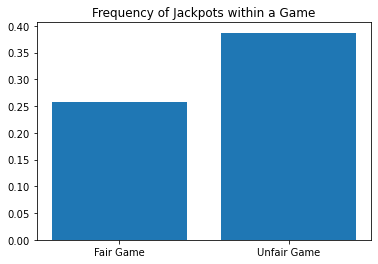

In [23]:
plt.bar(xaxis, yaxis);
plt.title(title)
plt.show()

A barplot comparing the jackpot frequencies is displayed above.

## Scenario 2

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.

In [24]:
arr = np.array([1, 2, 3, 4, 5, 6])

fair_die = Die(arr)

unfair_die1 = Die(arr)
unfair_die1.change_weight(6, 5)

unfair_die2 = Die(arr)
unfair_die2.change_weight(1, 5)

Play a game of 10000 rolls with 5 fair dice.

In [25]:
fair_list = [fair_die, fair_die, fair_die, fair_die, fair_die]
fair_game = Game(fair_list)

In [26]:
fair_game.play(10000)

Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [27]:
unfair_list = [unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die]
unfair_game = Game(unfair_list)

In [28]:
unfair_game.play(10000)

For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

First we analyze the fair 6-sided game.

In [29]:
fair_results = fair_game.show_results('narrow')

In [30]:
fair_analysis = Analyzer(fair_results)

In [31]:
fair_jackpots = fair_analysis.comp_jackpot()
print(fair_jackpots)

8


In [32]:
fair_analysis.jackpot_df

,0,1,2,3,4
roll_number,,,,,
132,4.0,4.0,4.0,4.0,4.0
3335,6.0,6.0,6.0,6.0,6.0
3741,3.0,3.0,3.0,3.0,3.0
4158,2.0,2.0,2.0,2.0,2.0
4439,3.0,3.0,3.0,3.0,3.0
4604,5.0,5.0,5.0,5.0,5.0
6791,5.0,5.0,5.0,5.0,5.0
9566,4.0,4.0,4.0,4.0,4.0


You can see the fair game's jackpots above.

Now we will move onto analyzing the number of jackpots in the unfair game.

In [33]:
unfair_results = unfair_game.show_results('narrow')

In [34]:
unfair_analysis = Analyzer(unfair_results)

In [35]:
unfair_jackpots = unfair_analysis.comp_jackpot()
print(unfair_jackpots)

14


In [36]:
unfair_analysis.jackpot_df

,0,1,2,3,4
roll_number,,,,,
2301,6.0,6.0,6.0,6.0,6.0
2805,6.0,6.0,6.0,6.0,6.0
2867,6.0,6.0,6.0,6.0,6.0
3197,6.0,6.0,6.0,6.0,6.0
3878,6.0,6.0,6.0,6.0,6.0
4164,6.0,6.0,6.0,6.0,6.0
4529,5.0,5.0,5.0,5.0,5.0
5519,1.0,1.0,1.0,1.0,1.0
6119,1.0,1.0,1.0,1.0,1.0


We see the unfair game jackpots above!

Now we are going to plot these two frequencies against each other in a simple bar chart.

In [37]:
fair_jackpot_freq = fair_jackpots / 10000
unfair_jackpot_freq = unfair_jackpots / 10000

In [38]:
xaxis = ['Fair Game', 'Unfair Game']
yaxis = [fair_jackpot_freq, unfair_jackpot_freq]
title = 'Frequency of Jackpots within a Game'

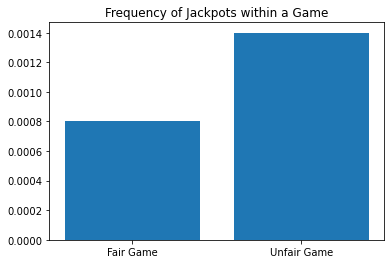

In [39]:
plt.bar(xaxis, yaxis);
plt.title(title)
plt.show()

You can visualize the frequencies of jackpots for each game above.

Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts. We will start by looking at most frequent combinations in the fair game.

In [40]:
fair_analysis.comp_combo()

In [41]:
fair_df = fair_analysis.combo_df
n_top10_fair_combos = pd.DataFrame(fair_df['n'].nlargest(n=10))

In [42]:
top10_fair_combos = n_top10_fair_combos.index.tolist()

In [43]:
top10_fair_combos # a list of tuples

[(1, 3, 4, 5, 6),
 (1, 2, 3, 4, 6),
 (2, 3, 4, 5, 6),
 (1, 2, 4, 5, 6),
 (1, 2, 3, 5, 6),
 (1, 2, 3, 4, 5),
 (1, 2, 2, 4, 5),
 (2, 3, 4, 4, 6),
 (1, 1, 3, 4, 5),
 (1, 2, 3, 3, 6)]

These are the 10 most frequent combinations in the fair game.

In [44]:
freq_lst = []
for val in n_top10_fair_combos['n']:
    freq_lst.append(val)
 # a list of the frequencies

In [45]:
dec_freq = []
for val in freq_lst:
    dec_freq.append(val / 10000)

In [46]:
title = 'Fair Game: Top 10 Most Frequent Combinations'

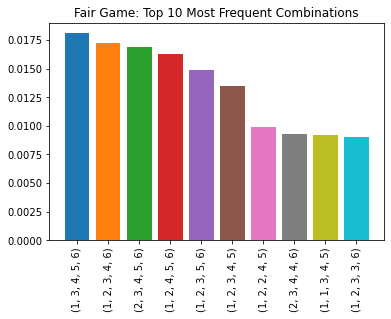

In [47]:
for i in zip(range(len(top10_fair_combos))):
    plt.bar(i, dec_freq[i[0]]);
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),\
           top10_fair_combos, rotation = 'vertical');
plt.title(title);
plt.show()

In the graph above, you can see how frequently each of the top 10 most frequent combinations appears in the fair game.

Now, we will move onto evaluating the top 10 most frequent combinations in the unfair game.

In [48]:
unfair_analysis.comp_combo()

In [49]:
unfair_df = unfair_analysis.combo_df
n_top10_unfair_combos = pd.DataFrame(unfair_df['n'].nlargest(n=10))

In [50]:
top10_unfair_combos = n_top10_unfair_combos.index.tolist()

In [51]:
top10_unfair_combos # a list of tuples

[(1, 2, 3, 6, 6),
 (1, 3, 5, 6, 6),
 (1, 4, 5, 6, 6),
 (1, 2, 4, 6, 6),
 (1, 2, 5, 6, 6),
 (1, 2, 4, 5, 6),
 (1, 1, 4, 6, 6),
 (1, 3, 4, 6, 6),
 (1, 3, 4, 5, 6),
 (1, 2, 3, 5, 6)]

In [52]:
freq_lst = []
for val in n_top10_unfair_combos['n']:
    freq_lst.append(val)
 # a list of the frequencies

In [53]:
dec_freq = []
for val in freq_lst:
    dec_freq.append(val / 10000)

In [54]:
title = 'Unfair Game: Top 10 Most Frequent Combinations'

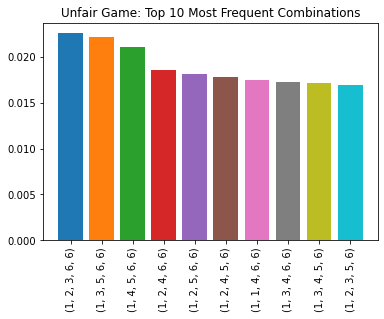

In [55]:
for i in zip(range(len(top10_fair_combos))):
    plt.bar(i, dec_freq[i[0]]);

plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),\
           top10_unfair_combos, rotation = 'vertical');
plt.title(title);
plt.show()

In the graph above, you can see how frequently each of the top 10 most frequent combinations appears in the unfair game.

## Scenario 3

Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [56]:
arr = np.array(['a', 'b', 'c', 'd', 'e', 'f',\
                'g', 'h', 'i', 'j', 'k', 'l',\
                'm', 'n', 'o', 'p', 'q', 'r',\
               's', 't', 'u', 'v', 'w', 'x',\
                'y', 'z'])
die = Die(arr)

In [57]:
die.change_weight('a', 8.4966)
die.change_weight('b', 2.0720)
die.change_weight('c', 4.5388)
die.change_weight('d', 3.3844)
die.change_weight('e', 11.1607)
die.change_weight('f', 1.8121)
die.change_weight('g', 2.4705)
die.change_weight('h', 3.0034)
die.change_weight('i', 7.5448)
die.change_weight('j', 0.1965)
die.change_weight('k', 1.1016)
die.change_weight('l', 5.4893)
die.change_weight('m', 3.0129)
die.change_weight('n', 6.6544)
die.change_weight('o', 7.1635)
die.change_weight('p', 3.1671)
die.change_weight('q', 0.1962)
die.change_weight('r', 7.5809)
die.change_weight('s', 5.7351)
die.change_weight('t', 6.9509)
die.change_weight('u', 3.6308)
die.change_weight('v', 1.0074)
die.change_weight('w', 1.2899)
die.change_weight('x', 0.2902)
die.change_weight('y', 1.7779)
die.change_weight('z', 0.2722)

In [58]:
die.show_die() # here you can see that all weights have been changed

,weight
side,
a,8.4966
b,2.0720
c,4.5388
d,3.3844
e,11.1607
f,1.8121
g,2.4705
h,3.0034
i,7.5448


Play a game involving 5 of these dice with 1000 rolls.

In [59]:
dice = [die, die, die, die, die]
game = Game(dice)

In [60]:
game.play(1000)

The code cell below will show the entire dataframe if desired.

In [61]:
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(game.show_results())

In [62]:
game.show_results().head(10)

die_number,0,1,2,3,4
roll_number,,,,,
0,p,l,f,t,p
1,e,n,i,l,e
2,e,e,t,t,u
3,v,p,u,f,e
4,l,o,t,g,t
5,a,n,n,h,e
6,l,o,o,l,m
7,h,u,n,d,l
8,i,c,y,t,s


In [63]:
game.show_results().tail(10)

die_number,0,1,2,3,4
roll_number,,,,,
990,i,m,n,i,y
991,a,g,g,u,a
992,e,a,o,l,p
993,o,m,n,e,t
994,t,i,s,e,n
995,o,c,c,t,n
996,s,k,l,o,l
997,h,t,o,u,e
998,g,p,u,m,c


After viewing the dataset, it appears that there are about 5 five-letter words made from the dice face combinations.

Based on your eye count, what is the relative frequency of these words versus the rest?

It appears that words are not incredibly frequent in the dataframe. Based on an estimation of 5 words, the frequency of full words would be low.

In [64]:
word_freq = 5/1000
print(word_freq)

0.005


The frequency of word appearance is approximately 0.005.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [65]:
!ls -lRF -o

total 376
-rw-r--r--  1 eveschoenrock   1066 Jul 12 09:55 LICENSE
-rw-r--r--  1 eveschoenrock   8191 Jul 13 15:32 README.md
-rw-r--r--  1 eveschoenrock  67104 Jul 13 15:41 final-project-submission.ipynb
drwxr-xr-x@ 7 eveschoenrock    224 Jul 13 09:02 montecarlo/
drwxr-xr-x@ 6 eveschoenrock    192 Jul 13 09:02 montecarlo.egg-info/
-rw-r--r--  1 eveschoenrock    835 Jul 13 15:29 montecarlo_results.txt
-rw-r--r--  1 eveschoenrock  11343 Jul 13 15:36 montecarlo_tests.py
-rw-r--r--@ 1 eveschoenrock  89804 Jul 13 14:47 scenarios.ipynb
-rw-r--r--  1 eveschoenrock    345 Jul 12 09:59 setup.py

./montecarlo:
total 24
-rw-r--r--  1 eveschoenrock     0 Jul 12 09:58 __init__.py
drwxr-xr-x@ 4 eveschoenrock   128 Jul 13 09:02 __pycache__/
-rw-r--r--  1 eveschoenrock  9635 Jul 13 14:56 montecarlo.py

./montecarlo/__pycache__:
total 32
-rw-r--r--  1 eveschoenrock   154 Jul 12 10:02 __init__.cpython-37.pyc
-rw-r--r--  1 eveschoenrock  8523 Jul 13 15:20 montecarlo.cpython-37.pyc

./montecarlo.egg-info:


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [67]:
pip install -e .

Obtaining file:///Users/eveschoenrock/Desktop/Code/montecarlo
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
      Successfully uninstalled montecarlo-1.0.0
  Running setup.py develop for montecarlo
Note: you may need to restart the kernel to use updated packages.
